# Which is the Best Star Wars Movie?
Of the originl two Star Wars sagas, which is the best movie?

FiveThirtyEight created a survey in which they surveyed Star Wars fans and received 835 total responses. Their dataset is available online on their [GitHub](https://github.com/fivethirtyeight/data/tree/master/star-wars-survey).

I will be performing my own analysis of this data in order to draw my own conclusions. 

In [1]:
import pandas as pd
import numpy as np
star_wars = pd.read_csv("star_wars.csv", encoding="ISO-8859-1")

In [2]:
star_wars.head(10)

,RespondentID,Have you seen any of the 6 films in the Star Wars franchise?,Do you consider yourself to be a fan of the Star Wars film franchise?,Which of the following Star Wars films have you seen? Please select all that apply.,Unnamed: 4,Unnamed: 5,Unnamed: 6,Unnamed: 7,Unnamed: 8,Please rank the Star Wars films in order of preference with 1 being your favorite film in the franchise and 6 being your least favorite film.,...,Unnamed: 28,Which character shot first?,Are you familiar with the Expanded Universe?,Do you consider yourself to be a fan of the Expanded Universe?ÂÃ¦,Do you consider yourself to be a fan of the Star Trek franchise?,Gender,Age,Household Income,Education,Location (Census Region)
0,NaN,Response,Response,Star Wars: Episode I The Phantom Menace,Star Wars: Episode II Attack of the Clones,Star Wars: Episode III Revenge of the Sith,Star Wars: Episode IV A New Hope,Star Wars: Episode V The Empire Strikes Back,Star Wars: Episode VI Return of the Jedi,Star Wars: Episode I The Phantom Menace,...,Yoda,Response,Response,Response,Response,Response,Response,Response,Response,Response
1,3.292880e+09,Yes,Yes,Star Wars: Episode I The Phantom Menace,Star Wars: Episode II Attack of the Clones,Star Wars: Episode III Revenge of the Sith,Star Wars: Episode IV A New Hope,Star Wars: Episode V The Empire Strikes Back,Star Wars: Episode VI Return of the Jedi,3,...,Very favorably,I don't understand this question,Yes,No,No,Male,18-29,NaN,High school degree,South Atlantic
2,3.292880e+09,No,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,Yes,Male,18-29,"$0 - $24,999",Bachelor degree,West South Central
3,3.292765e+09,Yes,No,Star Wars: Episode I The Phantom Menace,Star Wars: Episode II Attack of the Clones,Star Wars: Episode III Revenge of the Sith,NaN,NaN,NaN,1,...,Unfamiliar (N/A),I don't understand this question,No,NaN,No,Male,18-29,"$0 - $24,999",High school degree,West North Central
4,3.292763e+09,Yes,Yes,Star Wars: Episode I The Phantom Menace,Star Wars: Episode II Attack of the Clones,Star Wars: Episode III Revenge of the Sith,Star Wars: Episode IV A New Hope,Star Wars: Episode V The Empire Strikes Back,Star Wars: Episode VI Return of the Jedi,5,...,Very favorably,I don't understand this question,No,NaN,Yes,Male,18-29,"$100,000 - $149,999",Some college or Associate degree,West North Central
5,3.292731e+09,Yes,Yes,Star Wars: Episode I The Phantom Menace,Star Wars: Episode II Attack of the Clones,Star Wars: Episode III Revenge of the Sith,Star Wars: Episode IV A New Hope,Star Wars: Episode V The Empire Strikes Back,Star Wars: Episode VI Return of the Jedi,5,...,Somewhat favorably,Greedo,Yes,No,No,Male,18-29,"$100,000 - $149,999",Some college or Associate degree,West North Central
6,3.292719e+09,Yes,Yes,Star Wars: Episode I The Phantom Menace,Star Wars: Episode II Attack of the Clones,Star Wars: Episode III Revenge of the Sith,Star Wars: Episode IV A New Hope,Star Wars: Episode V The Empire Strikes Back,Star Wars: Episode VI Return of the Jedi,1,...,Very favorably,Han,Yes,No,Yes,Male,18-29,"$25,000 - $49,999",Bachelor degree,Middle Atlantic
7,3.292685e+09,Yes,Yes,Star Wars: Episode I The Phantom Menace,Star Wars: Episode II Attack of the Clones,Star Wars: Episode III Revenge of the Sith,Star Wars: Episode IV A New Hope,Star Wars: Episode V The Empire Strikes Back,Star Wars: Episode VI Return of the Jedi,6,...,Very favorably,Han,Yes,No,No,Male,18-29,NaN,High school degree,East North Central
8,3.292664e+09,Yes,Yes,Star Wars: Episode I The Phantom Menace,Star Wars: Episode II Attack of the Clones,Star Wars: Episode III Revenge of the Sith,Star Wars: Episode IV A New Hope,Star Wars: Episode V The Empire Strikes Back,Star Wars: Episode VI Return of the Jedi,4,...,Very favorably,Han,No,NaN,Yes,Male,18-29,NaN,High school degree,South Atlantic
9,3.292654e+09,Yes,Yes,Star Wars: Episode I The Phantom Menace,Star Wars: Episode II Attack of the Clones,Star Wars: Episode III Revenge of the Sith,Star Wars: Episode IV A New Hope,Star Wars: Epi

In [3]:
star_wars.columns

Index(['RespondentID',
       'Have you seen any of the 6 films in the Star Wars franchise?',
       'Do you consider yourself to be a fan of the Star Wars film franchise?',
       'Which of the following Star Wars films have you seen? Please select all that apply.',
       'Unnamed: 4', 'Unnamed: 5', 'Unnamed: 6', 'Unnamed: 7', 'Unnamed: 8',
       'Please rank the Star Wars films in order of preference with 1 being your favorite film in the franchise and 6 being your least favorite film.',
       'Unnamed: 10', 'Unnamed: 11', 'Unnamed: 12', 'Unnamed: 13',
       'Unnamed: 14',
       'Please state whether you view the following characters favorably, unfavorably, or are unfamiliar with him/her.',
       'Unnamed: 16', 'Unnamed: 17', 'Unnamed: 18', 'Unnamed: 19',
       'Unnamed: 20', 'Unnamed: 21', 'Unnamed: 22', 'Unnamed: 23',
       'Unnamed: 24', 'Unnamed: 25', 'Unnamed: 26', 'Unnamed: 27',
       'Unnamed: 28', 'Which character shot first?',
       'Are you familiar with the Expan

In [4]:
star_wars.shape

(1187, 38)

In [5]:
star_wars = star_wars[star_wars['RespondentID'].notnull()]

In [6]:
star_wars.shape

(1186, 38)

### Convert 'Yes' / 'No' Questions to Boolean Values (True / False)

In [7]:
star_wars['Have you seen any of the 6 films in the Star Wars franchise?'].value_counts(dropna=False)

Yes    936
No     250
Name: Have you seen any of the 6 films in the Star Wars franchise?, dtype: int64

In [8]:
to_boolean = {'Yes' : True,
              'No'  : False}

In [9]:
star_wars['Have you seen any of the 6 films in the Star Wars franchise?'] = \
    star_wars['Have you seen any of the 6 films in the Star Wars franchise?'].map(to_boolean)

In [10]:
star_wars['Have you seen any of the 6 films in the Star Wars franchise?'].value_counts(dropna=False)

True     936
False    250
Name: Have you seen any of the 6 films in the Star Wars franchise?, dtype: int64

In [11]:
star_wars['Do you consider yourself to be a fan of the Star Wars film franchise?'].value_counts(dropna=False)

Yes    552
NaN    350
No     284
Name: Do you consider yourself to be a fan of the Star Wars film franchise?, dtype: int64

In [12]:
star_wars['Do you consider yourself to be a fan of the Star Wars film franchise?'] = \
    star_wars['Do you consider yourself to be a fan of the Star Wars film franchise?'].map(to_boolean)

In [13]:
star_wars['Do you consider yourself to be a fan of the Star Wars film franchise?'].value_counts(dropna=False)

True     552
NaN      350
False    284
Name: Do you consider yourself to be a fan of the Star Wars film franchise?, dtype: int64

### Convert Values to Boolean and Rename Columns 
For the columns related to the question 'Which of the following Star Wars films have you seen?' convert the values to boolean values and rename the respective column.

In [14]:
star_wars['Which of the following Star Wars films have you seen? Please select all that apply.'].\
    value_counts(dropna=False)

Star Wars: Episode I  The Phantom Menace    673
NaN                                         513
Name: Which of the following Star Wars films have you seen? Please select all that apply., dtype: int64

In [16]:
seen_1_boolean = {'Star Wars: Episode I  The Phantom Menace' : True,
                  np.NaN : False}

In [17]:
star_wars['Which of the following Star Wars films have you seen? Please select all that apply.'] = \
    star_wars['Which of the following Star Wars films have you seen? Please select all that apply.'].\
        map(seen_1_boolean)

In [18]:
star_wars['Which of the following Star Wars films have you seen? Please select all that apply.'].\
    value_counts(dropna=False)

True     673
False    513
Name: Which of the following Star Wars films have you seen? Please select all that apply., dtype: int64

In [19]:
star_wars['Unnamed: 4'].value_counts(dropna=False)

NaN                                            615
Star Wars: Episode II  Attack of the Clones    571
Name: Unnamed: 4, dtype: int64

In [21]:
seen_2_boolean = {'Star Wars: Episode II  Attack of the Clones' : True,
                  np.NaN : False}

In [22]:
star_wars['Unnamed: 4'] = star_wars['Unnamed: 4'].map(seen_2_boolean)

In [23]:
star_wars['Unnamed: 4'].value_counts(dropna=False)

False    615
True     571
Name: Unnamed: 4, dtype: int64

In [24]:
star_wars['Unnamed: 5'].value_counts(dropna=False)

NaN                                            636
Star Wars: Episode III  Revenge of the Sith    550
Name: Unnamed: 5, dtype: int64

In [25]:
seen_3_boolean = {'Star Wars: Episode III  Revenge of the Sith' : True,
                  np.NaN : False}

In [26]:
star_wars['Unnamed: 5'] = star_wars['Unnamed: 5'].map(seen_3_boolean)

In [27]:
star_wars['Unnamed: 5'].value_counts(dropna=False)

False    636
True     550
Name: Unnamed: 5, dtype: int64

In [28]:
star_wars['Unnamed: 6'].value_counts(dropna=False)

Star Wars: Episode IV  A New Hope    607
NaN                                  579
Name: Unnamed: 6, dtype: int64

In [29]:
seen_4_boolean = {'Star Wars: Episode IV  A New Hope' : True,
                  np.NaN : False}

In [30]:
star_wars['Unnamed: 6'] = star_wars['Unnamed: 6'].map(seen_4_boolean)

In [31]:
star_wars['Unnamed: 6'].value_counts(dropna=False)

True     607
False    579
Name: Unnamed: 6, dtype: int64

In [32]:
star_wars['Unnamed: 7'].value_counts(dropna=False)

Star Wars: Episode V The Empire Strikes Back    758
NaN                                             428
Name: Unnamed: 7, dtype: int64

In [33]:
seen_5_boolean = {'Star Wars: Episode V The Empire Strikes Back' : True,
                  np.NaN : False}

In [34]:
star_wars['Unnamed: 7'] = star_wars['Unnamed: 7'].map(seen_5_boolean)

In [35]:
star_wars['Unnamed: 7'].value_counts(dropna=False)

True     758
False    428
Name: Unnamed: 7, dtype: int64

In [36]:
star_wars['Unnamed: 8'].value_counts(dropna=False)

Star Wars: Episode VI Return of the Jedi    738
NaN                                         448
Name: Unnamed: 8, dtype: int64

In [38]:
seen_6_boolean = {'Star Wars: Episode VI Return of the Jedi' : True,
                  np.NaN : False}

In [39]:
star_wars['Unnamed: 8'] = star_wars['Unnamed: 8'].map(seen_6_boolean)

In [40]:
star_wars['Unnamed: 8'].value_counts(dropna=False)

True     738
False    448
Name: Unnamed: 8, dtype: int64

In [41]:
rename_cols = {'Which of the following Star Wars films have you seen? Please select all that apply.' : 'seen_1',
               'Unnamed: 4' : 'seen_2',
               'Unnamed: 5' : 'seen_3',
               'Unnamed: 6' : 'seen_4',
               'Unnamed: 7' : 'seen_5',
               'Unnamed: 8' : 'seen_6'}

In [49]:
star_wars.rename(columns=rename_cols, inplace=True)

In [50]:
star_wars.columns

Index(['RespondentID',
       'Have you seen any of the 6 films in the Star Wars franchise?',
       'Do you consider yourself to be a fan of the Star Wars film franchise?',
       'seen_1', 'seen_2', 'seen_3', 'seen_4', 'seen_5', 'seen_6',
       'Please rank the Star Wars films in order of preference with 1 being your favorite film in the franchise and 6 being your least favorite film.',
       'Unnamed: 10', 'Unnamed: 11', 'Unnamed: 12', 'Unnamed: 13',
       'Unnamed: 14',
       'Please state whether you view the following characters favorably, unfavorably, or are unfamiliar with him/her.',
       'Unnamed: 16', 'Unnamed: 17', 'Unnamed: 18', 'Unnamed: 19',
       'Unnamed: 20', 'Unnamed: 21', 'Unnamed: 22', 'Unnamed: 23',
       'Unnamed: 24', 'Unnamed: 25', 'Unnamed: 26', 'Unnamed: 27',
       'Unnamed: 28', 'Which character shot first?',
       'Are you familiar with the Expanded Universe?',
       'Do you consider yourself to be a fan of the Expanded Universe?ÂÃ¦',
       'Do 

### Convert Columns to Numeric Values and Rename Columns
For the columns related to the question 'Please rank the Star Wars films in order of preference with 1 being you favorite in the franchise and 6 being your least favorite film.', convert the values to numerical values (1-6). Then rename the respective columns to something more relevant.

In [51]:
star_wars[star_wars.columns[9:15]] = star_wars[star_wars.columns[9:15]].astype(float)

In [55]:
rename_cols_2 = {'Please rank the Star Wars films in order of preference with 1 being your favorite film in the franchise and 6 being your least favorite film.' : 'ranking_1',
                 'Unnamed: 10' : 'ranking_2',
                 'Unnamed: 11' : 'ranking_3',
                 'Unnamed: 12' : 'ranking_4',
                 'Unnamed: 13' : 'ranking_5',
                 'Unnamed: 14' : 'ranking_6'}

In [56]:
star_wars.rename(columns=rename_cols_2, inplace=True)

In [57]:
star_wars.columns

Index(['RespondentID',
       'Have you seen any of the 6 films in the Star Wars franchise?',
       'Do you consider yourself to be a fan of the Star Wars film franchise?',
       'seen_1', 'seen_2', 'seen_3', 'seen_4', 'seen_5', 'seen_6', 'ranking_1',
       'ranking_2', 'ranking_3', 'ranking_4', 'ranking_5', 'ranking_6',
       'Please state whether you view the following characters favorably, unfavorably, or are unfamiliar with him/her.',
       'Unnamed: 16', 'Unnamed: 17', 'Unnamed: 18', 'Unnamed: 19',
       'Unnamed: 20', 'Unnamed: 21', 'Unnamed: 22', 'Unnamed: 23',
       'Unnamed: 24', 'Unnamed: 25', 'Unnamed: 26', 'Unnamed: 27',
       'Unnamed: 28', 'Which character shot first?',
       'Are you familiar with the Expanded Universe?',
       'Do you consider yourself to be a fan of the Expanded Universe?ÂÃ¦',
       'Do you consider yourself to be a fan of the Star Trek franchise?',
       'Gender', 'Age', 'Household Income', 'Education',
       'Location (Census Region)'],

### Plotting the Averaging Ranking of the Star Wars Movies as Rated by Survey
Since 1 represents the fans favorite movie and 6 their worst, the lower the rating, the higher the rans ranked that movie.

In [64]:
ave_ranking = star_wars.iloc[:, 9:15].mean()

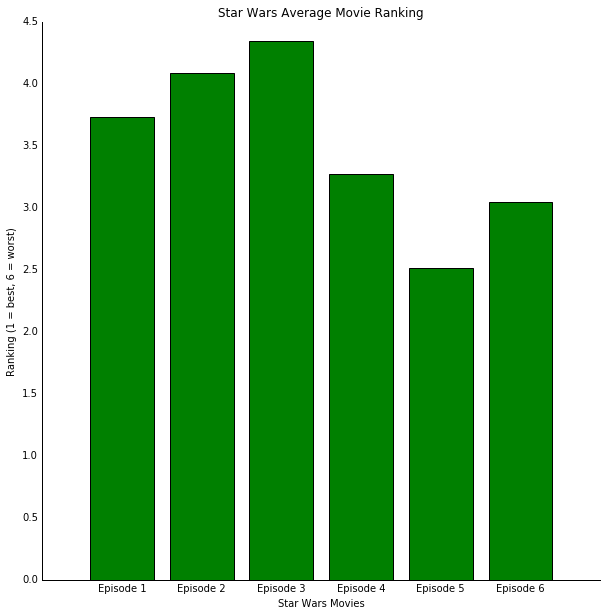

In [113]:
import matplotlib.pyplot as plt
%matplotlib inline

x_list = np.arange(len(ave_ranking))

fig, ax = plt.subplots(figsize=(10,10))

ax.bar(x_list, ave_ranking, align='center', color='g')

ax.set_xticklabels(['',
                    'Episode 1',
                    'Episode 2',
                    'Episode 3',
                    'Episode 4',
                    'Episode 5',
                    'Episode 6'])

ax.spines['right'].set_visible(False)
ax.spines['top'].set_visible(False)

ax.tick_params(axis='both',
               right=False,
               top=False,
               left=False,
               bottom=False)

ax.set_title('Star Wars Average Movie Ranking')
ax.set_xlabel('Star Wars Movies')
ax.set_ylabel('Ranking (1 = best, 6 = worst)')

plt.show();

### Understaning the Graph Above
The graph above seems to clearly show that, on average, fans ranked Episode 5 as their favorite movie in the franchise (prior to the release of Episdoe 7...). Episode 5 received an average ranking of about 2.5, followed up Episode 6 with an average ranking of about 3. 

This is consistent with what the staff at FiveThirtyEight believed to be the general consensus among Star Wars fans.

In [92]:
n_views = star_wars.iloc[:, 3:9].sum()

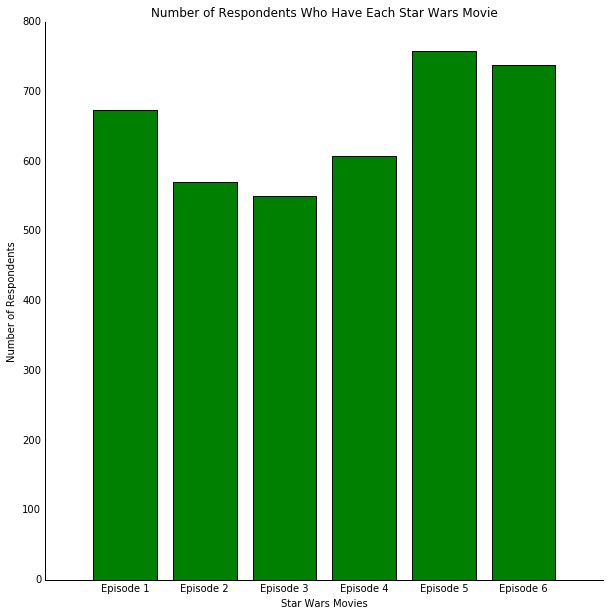

In [112]:
x_list = np.arange(len(ave_ranking))

fig, ax = plt.subplots(figsize=(10,10))

ax.bar(x_list, n_views, align='center', color='g')

ax.set_xticklabels(['',
                    'Episode 1',
                    'Episode 2',
                    'Episode 3',
                    'Episode 4',
                    'Episode 5',
                    'Episode 6'])

ax.spines['right'].set_visible(False)
ax.spines['top'].set_visible(False)

ax.tick_params(axis='both',
               right=False,
               top=False,
               left=False,
               bottom=False)

ax.set_title('Number of Respondents Who Have Each Star Wars Movie')
ax.set_xlabel('Star Wars Movies')
ax.set_ylabel('Number of Respondents')

plt.show();

### Understanding the Graph Above
The graph above represents the number of respondents who have seen each of the Star Wars movies. It appears that Episode 5 has beeen seen my the most number of respondents. It also happens to be the movie ranked the highest among the respondents as well. This is may be a coincidence but it might also be that some respondents have only seen Episode 5 and therefore it was their one and only favorite movie.

In [97]:
males = star_wars[star_wars['Gender'] == 'Male']
females = star_wars[star_wars['Gender'] == 'Female']

In [100]:
ave_ranking_males = males.iloc[:, 9:15].mean()
ave_ranking_females = females.iloc[:,9:15].mean()

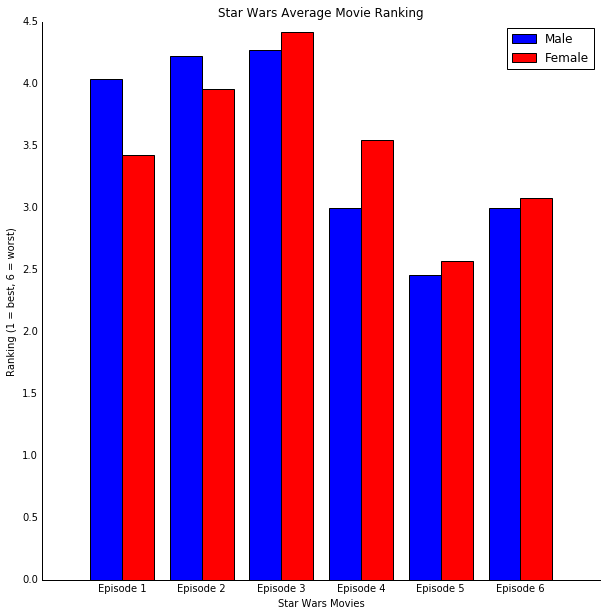

In [110]:
x_list = np.arange(len(ave_ranking))

fig, ax = plt.subplots(figsize=(10,10))

ax.bar(x_list-0.2, ave_ranking_males, align='center', width=0.4, 
       label='Male', color='b')
ax.bar(x_list+0.2, ave_ranking_females, align='center', width=0.4, 
       label='Female', color='r')

ax.legend()

ax.set_xticklabels(['',
                    'Episode 1',
                    'Episode 2',
                    'Episode 3',
                    'Episode 4',
                    'Episode 5',
                    'Episode 6'])

ax.spines['right'].set_visible(False)
ax.spines['top'].set_visible(False)

ax.tick_params(axis='both',
               right=False,
               top=False,
               left=False,
               bottom=False)

ax.set_title('Star Wars Average Movie Ranking')
ax.set_xlabel('Star Wars Movies')
ax.set_ylabel('Ranking (1 = best, 6 = worst)')

plt.show();

### Understanding the Graph Above
It appears that both male and female respondents, on average, rank Episode 5 has their favorite. Male respondents appear to like both Episode 4 and 6 about the same with an average score of about 3 while the female respondents seemed to prefer Episode 6. They also appear to difference in fondness as it relates to Episode 1, where the female respondents preferring much more than the males. 

In [115]:
fans_yes = star_wars[star_wars['Do you consider yourself to be a fan of the Star Wars film franchise?'] == True]
fans_no = star_wars[star_wars['Do you consider yourself to be a fan of the Star Wars film franchise?'] == False]

In [116]:
ave_ranking_fans_yes = fans_yes.iloc[:, 9:15].mean()
ave_ranking_fans_no = fans_no.iloc[:,9:15].mean()

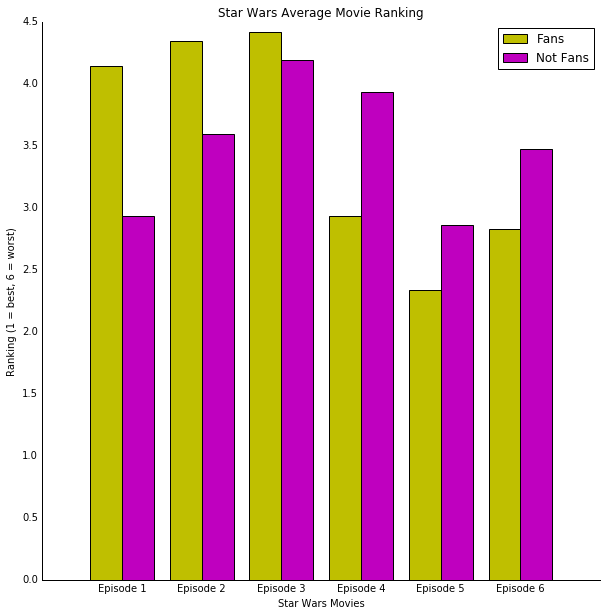

In [121]:
x_list = np.arange(len(ave_ranking))

fig, ax = plt.subplots(figsize=(10,10))

ax.bar(x_list-0.2, ave_ranking_fans_yes, align='center', width=0.4, 
       label='Fans', color='y')
ax.bar(x_list+0.2, ave_ranking_fans_no, align='center', width=0.4, 
       label='Not Fans', color='m')

ax.legend()

ax.set_xticklabels(['',
                    'Episode 1',
                    'Episode 2',
                    'Episode 3',
                    'Episode 4',
                    'Episode 5',
                    'Episode 6'])

ax.spines['right'].set_visible(False)
ax.spines['top'].set_visible(False)

ax.tick_params(axis='both',
               right=False,
               top=False,
               left=False,
               bottom=False)

ax.set_title('Star Wars Average Movie Ranking')
ax.set_xlabel('Star Wars Movies')
ax.set_ylabel('Ranking (1 = best, 6 = worst)')

plt.show();

### Understanind the Graph Above
The respondents that consider themselves fans of Star Wars rank Episode 5, on average, higher than any of the other movies, with an average ranking just below 2.5. Whereas those that don't consider themselves fans, they tend to rank Episode 1 and 5 as their favorite with an average score just below 3.